In [1]:
import pandas as pd
import os
import numpy as np

loc = 'train'
dic={'time':-1,'Age':0,'Gender':1,'Height':2,'ICUType':3,'Weight':4,'Albumin':5,\
             'ALP':6,'ALT':7,'AST':8,'Bilirubin':9,'BUN':10,'Cholesterol':11,'Creatinine':12,\
             'DiasABP':13,'FiO2':14,'GCS':15,'Glucose':16,'HCO3':17,'HCT':18,'HR':19,\
             'K':20,'Lactate':21,'Mg':22,'MAP':23,'MechVent':24,'Na':25,'NIDiasABP':26,\
             'NIMAP':27,'NISysABP':28,'PaCO2':29,'PaO2':30,'pH':31,'Platelets':32,'RespRate':33,\
             'SaO2':34,'SysABP':35,'Temp':36,'TroponinI':37,'TroponinT':38,'Urine':39,'WBC':40}

def handle(loc):
    dataPath = '../Multivariate-Time-Series-Imputation-with-Generative-Adversarial-Networks/set-a/{}/'.format(loc)
    labelFile = '../Multivariate-Time-Series-Imputation-with-Generative-Adversarial-Networks/set-a/{}/list.txt'.format(loc)
    data_lis = []
    with open(labelFile, "r") as f:
        line_num = 0
        for line in f.readlines():
            if line_num!=0:
                words = line.strip().split(',') 
                if os.path.isfile(os.path.join(dataPath, words[0]+".txt")):
                    data_lis.append((words[0]+".txt", words[len(words)-1]))
            line_num += 1   

    print(len(data_lis))        
    sta = []
    dyn = []
    lis = [x for x,y in dic.items()]
    print(lis)
    for fileName, label in data_lis:
        with open(os.path.join(dataPath, fileName)) as f:
            #read_csv is DataFrame, need to be transformed into ndarray
            count=0
            age=gender=height=icutype=weight=np.nan
            lastTime=0
            totalData=[]
            for line in f.readlines():
                if count > 1:
                    words=line.split(",")
                    timestamp=words[0]
                    feature=words[1]
                    value=words[2]

                    # -1 is missing value
                    if timestamp == "00:00":
                        if feature=='Age':
                            age=float(value)
                            if age == -1: age = np.nan
                        if feature=='Gender':
                            gender=int(value)
                            if gender == -1: gender = np.nan
                        if feature=='Height':
                            height=float(value)
                            if height == -1: height = np.nan
                        if feature == 'ICUType':
                            icutype=int(value)
                            if icutype == -1: icutype = np.nan
                        if feature=='Weight':
                            weight=float(value)
                            if weight == -1: weight = np.nan
                    else:
                        if timestamp!=lastTime:
                            data=[np.nan]*42
                            hourandminute=timestamp.split(":")
                            data[0]=float(hourandminute[0])*60+float(hourandminute[1])
                            """
                            data[1]=float(age)
                            data[2]=float(gender)
                            data[3]=float(height)
                            data[4]=float(icutype)
                            data[5]=float(weight)
                            """
                            if float(value)!=-1:
                                data[dic[feature]]=float(value)
                            if feature == 'Weight':
                                assert float(value) == float(weight)
                            totalData.append(data)
                        else:
                            totalData[len(totalData)-1][dic[feature]]=float(value)
                    lastTime=timestamp

                count+=1
        sta.append([age,gender,height,icutype,weight,int(label)])
        d = np.array(totalData)
        #for i in range(len(d)-1, 0, -1):
        #    d[i][0]-=d[i-1][0]
        d = pd.DataFrame(d, columns=lis)
        dyn.append(d.drop(columns=['Age', 'Gender','Height','ICUType','Weight', 'WBC']))
        
    sta = pd.DataFrame(np.array(sta), columns=['Age', 'Gender','Height','ICUType','Weight', 'Label'])
    return sta,dyn


In [2]:
sta,dyn=handle('train')

3594
['time', 'Age', 'Gender', 'Height', 'ICUType', 'Weight', 'Albumin', 'ALP', 'ALT', 'AST', 'Bilirubin', 'BUN', 'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'Mg', 'MAP', 'MechVent', 'Na', 'NIDiasABP', 'NIMAP', 'NISysABP', 'PaCO2', 'PaO2', 'pH', 'Platelets', 'RespRate', 'SaO2', 'SysABP', 'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC']


In [3]:
sta

,Age,Gender,Height,ICUType,Weight,Label
0,54.0,0.0,NaN,4.0,NaN,0.0
1,76.0,1.0,175.3,2.0,76.0,0.0
2,44.0,0.0,NaN,3.0,56.7,0.0
3,68.0,1.0,180.3,3.0,84.6,0.0
4,88.0,0.0,NaN,3.0,NaN,0.0
...,...,...,...,...,...,...
3589,39.0,1.0,177.8,3.0,87.1,0.0
3590,58.0,0.0,NaN,1.0,102.8,0.0
3591,90.0,1.0,NaN,3.0,78.0,0.0
3592,56.0,0.0,170.2,2.0,131.2,0.0


In [4]:
dyn[0]

,time,Albumin,ALP,ALT,AST,Bilirubin,BUN,Cholesterol,Creatinine,DiasABP,...,PaO2,pH,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine
0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,19.0,NaN,NaN,35.1,NaN,NaN,900.0,NaN
1,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,19.0,NaN,NaN,35.6,NaN,NaN,60.0,NaN
2,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN
3,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN
4,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,37.8,NaN,NaN,60.0,NaN
6,277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN
8,457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.0,NaN,NaN,38.1,NaN,NaN,120.0,NaN
9,517.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN


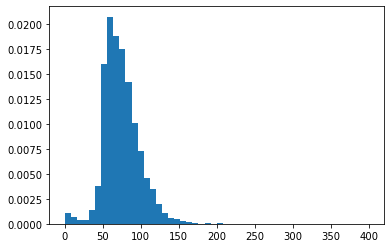

In [5]:
sta_types = ['int', 'binary', 'continuous', 'categorical','continuous','binary', 'int']
dyn_types = ['continuous']*len(dyn[0].columns)
dynamics = pd.concat(dyn)
seq_len = [len(x) for x in dyn]
sta["seq_len"]=np.array(seq_len)

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(seq_len, range=(0,400), bins=50, density=True)
plt.show()

In [6]:
from general.missingprocessor import Processor
d_P = Processor(dyn_types, use_pri='time')
s_P = Processor(sta_types)
d_P.fit(dynamics)
s_P.fit(sta)

all values are integer
time 1 None int None
[2880.] [0.]
all values are integer
Albumin 1 0.9895646686275172 int None
[2205.] [12.]
all values are integer
ALP 1 0.9892791808001923 int None
[11030.] [1.]
all values are integer
ALT 1 0.9892603987062893 int None
[18430.] [4.]
AST 1 0.9892115652621417 continuous None
[47.7] [0.1]
Bilirubin 1 0.9529020213289459 continuous None
[197.] [2.]
all values are integer
BUN 1 0.9989557155789957 int None
[330.] [28.]
Cholesterol 1 0.9526503412706462 continuous None
[22.1] [0.1]
all values are integer
Creatinine 1 0.5072555228747122 int None
[268.] [0.]
DiasABP 1 0.8909962398248006 continuous None
[1.] [0.21]
all values are integer
FiO2 1 0.7931039664025904 int None
[15.] [3.]
all values are integer
GCS 1 0.9559973104041531 int None
[1143.] [10.]
Glucose 1 0.9539425493311696 continuous None
[50.] [5.]
HCO3 1 0.9379852823512177 continuous None
[61.2] [9.]
HCT 1 0.2261364105915984 continuous None
[300.] [0.]
HR 1 0.9512266585528021 continuous None
[22.9

In [7]:
def build_dataset(sta, dyn, seq_len):
    s = s_P.transform(sta)
    d_lis=[d_P.transform(ds) for ds in dyn]
    d = [x[0].tolist() for x in d_lis]
    lag = [x[1].tolist() for x in d_lis]
    mask = [x[2].tolist() for x in d_lis]
    times = [x[-1].tolist() for x in d_lis]
    priv = [x[3].tolist() for x in d_lis]
    nex = [x[4].tolist() for x in d_lis]
    label = [float(x[-2]) for x in s] 
    from fastNLP import DataSet
    dataset = DataSet({"seq_len": seq_len, 
                       "dyn": d, "lag":lag, "mask": mask,
                       "sta": s, "times":times, "priv":priv, "nex":nex, "label": label
                      })
    return dataset

dataset = build_dataset(sta, dyn, seq_len)

In [8]:
test_sta, test_dyn = handle('test')
test_seq_len = [len(x) for x in test_dyn]
test_sta["seq_len"]=np.array(test_seq_len)
val_set = build_dataset(test_sta, test_dyn, test_seq_len)

400
['time', 'Age', 'Gender', 'Height', 'ICUType', 'Weight', 'Albumin', 'ALP', 'ALT', 'AST', 'Bilirubin', 'BUN', 'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'Mg', 'MAP', 'MechVent', 'Na', 'NIDiasABP', 'NIMAP', 'NISysABP', 'PaCO2', 'PaO2', 'pH', 'Platelets', 'RespRate', 'SaO2', 'SysABP', 'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC']


In [9]:
finaldic = {
    "train_set": dataset,
    'raw_set': (sta,dyn),
    'test_set': (test_sta,test_dyn),
    'val_set': val_set,
    "dynamic_processor": d_P,
    "static_processor":s_P
}
import pickle
from utils.general import make_sure_path_exists
make_sure_path_exists("./data/physio_data/")
with open("./data/physio_data/full2012.pkl", "wb") as f:
    pickle.dump(finaldic, f)
